# Quarto Blog

## **Analysis of Breathing Patterns Using Filtered Audio Data**

### **Aim:**

The aim of this study is to analyze breathing patterns using audio data
collected through a headset earphone with a strategically placed
microphone inside a mask. Our goal is to determine the frequency range
of the breathing information and develop a method to count breaths based
on the intersection points between filtered and smoothed audio data.

### **Approach:**

1.  **Recording Audio Data:** Audio data was recorded using a headset
    earphone with a microphone strategically placed inside a mask to
    capture breathing sounds. The recorded audio file was saved for
    further analysis.

In [1]:
# all imported lib

import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import butter, filtfilt

# Load the audio file
audio_path = 'sample1.wav'
y, sr = librosa.load(audio_path)

1.  **Determining Sampling Rate:** The sampling rate of the recorded
    audio was determined using the `librosa` library in Python. This
    information is crucial for subsequent signal processing steps.

In [2]:
print(f"Sample Rate : \033[92m{sr} hz\033[0m \n\n")
print(f"Audio data : \033[92m{y}\033[0m")

# Calculate the duration of the audio in seconds
audio_duration = len(y) / sr
print(f"duration : \033[92m{(audio_duration):.3f} s\033[0m  or {int(audio_duration // 60)} min {(audio_duration % 60):.3f} s")

Sample Rate : 22050 hz 


Audio data : [0.         0.         0.         ... 0.03269674 0.0326085  0.02392104]
duration : 158.272 s  or 2 min 38.272 s


1.  **Filtering Higher Frequencies:** Digital signal processing
    techniques were applied to filter out higher frequencies from the
    recorded audio data. A low-pass filter was utilized to allow
    frequencies below a certain cutoff while attenuating frequencies
    above that cutoff.

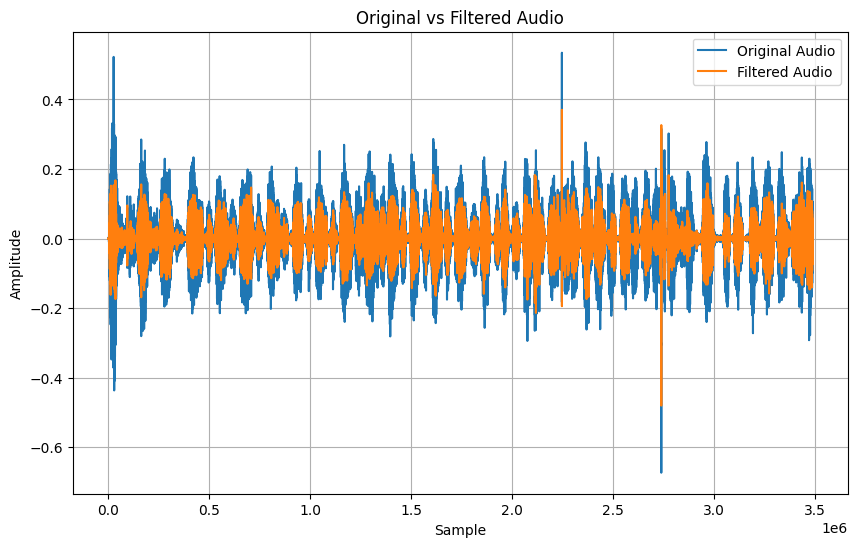

In [3]:
from scipy import signal

# Define the cutoff frequency for the low-pass filter (in Hz)
cutoff_frequency = 200  # Adjust as needed

# Normalize the cutoff frequency
normalized_cutoff_frequency = cutoff_frequency / (sr / 2)

# Design the low-pass filter
b, a = signal.butter(4, normalized_cutoff_frequency, btype='low')

# Apply the filter to the audio data
filtered_audio_data = signal.filtfilt(b, a, y)

# Plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Audio')
plt.plot(filtered_audio_data, label='Filtered Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original vs Filtered Audio')
plt.legend()
plt.grid(True)
plt.show()

-   Now apply low pass filter to Loudness to smoothing the graph

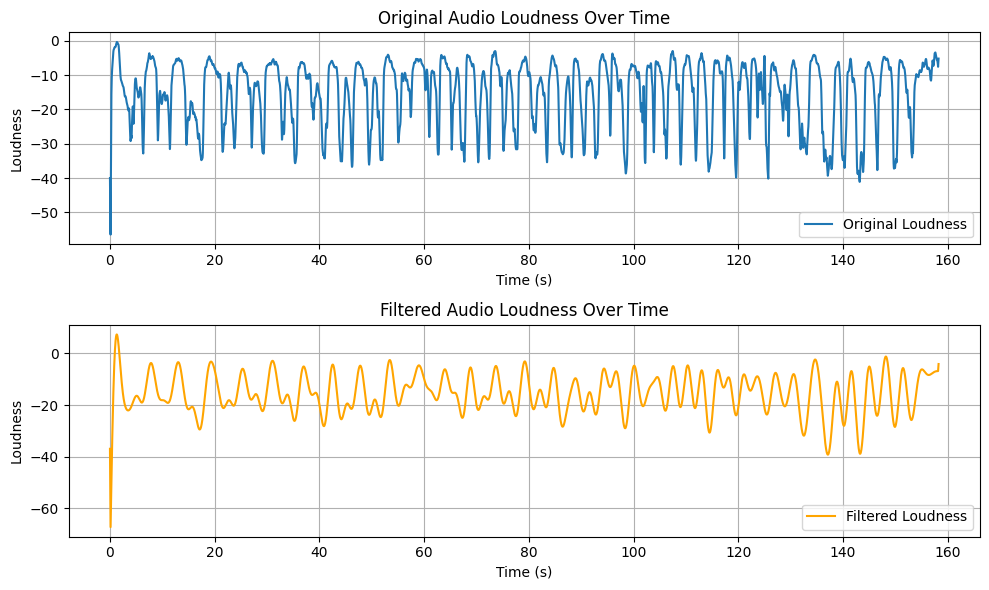

In [4]:
# Design Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y


loudness = librosa.amplitude_to_db(librosa.feature.rms(y=y), ref=np.max)
window_size = 10  # Adjust the window size as needed
loudness_smooth = np.convolve(loudness.squeeze(), np.ones(window_size)/window_size, mode='same')
# Compute the time axis for plotting
time = librosa.times_like(loudness)

# Set filter parameters
cutoff_freq = 200  # 200 Hz
order = 5

# Apply Butterworth low-pass filter
filtered_loudness = butter_lowpass_filter(loudness, cutoff_freq, sr, order=order)
filtered_loudness_smooth = np.convolve(filtered_loudness.squeeze(), np.ones(window_size)/window_size, mode='same')

# Plot original and filtered loudness over time
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, loudness_smooth, label='Original Loudness')
plt.title('Original Audio Loudness Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Loudness')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, filtered_loudness_smooth, label='Filtered Loudness', color='orange')
plt.title('Filtered Audio Loudness Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Loudness')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


1.  **Counting Breaths:** Two distinct graphs were presented: one
    representing the filtered audio data (red line) and the other
    signifying a heavily smoothed version (green line). The intersection
    points between these lines were utilized to determine the count of
    breaths. When the smoothed line intersected with the filtered line,
    it indicated a significant change in the audio signal, likely
    corresponding to a breath. By counting these intersection points,
    the number of breaths was estimated.

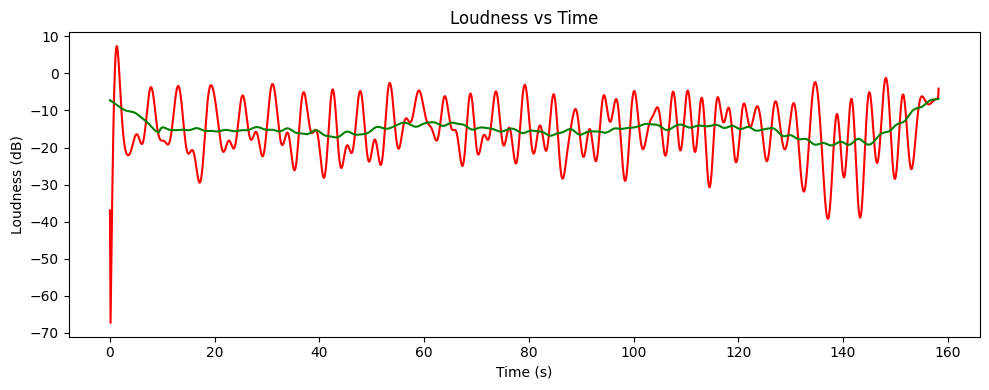

In [5]:
# Apply moving average filter to smoothen the loudness data
window_size = 800  # Adjust the window size as needed
loudness_smooth1 = np.convolve(filtered_loudness_smooth.squeeze(), np.ones(window_size)/window_size, mode='same')  

# Compute the time axis for plotting
time = librosa.times_like(loudness)

# Plot loudness over time
plt.figure(figsize=(10, 4))
# plt.plot(time, loudness_smooth, color='b')
plt.plot(time, filtered_loudness_smooth , color='r')
plt.plot(time, loudness_smooth1, color='g')
plt.xlabel('Time (s)')
plt.ylabel('Loudness (dB)')
plt.title('Loudness vs Time')
plt.tight_layout()
plt.show()

In [6]:
count = 0
for i in range(1,len(time)):
    if ((filtered_loudness_smooth[i-1] > loudness_smooth1[i-1]   and  filtered_loudness_smooth[i] < loudness_smooth1[i] ) or 
        (filtered_loudness_smooth[i-1] < loudness_smooth1[i-1] and   filtered_loudness_smooth[i] > loudness_smooth1[i])):
        count += 1
print("number of intersection: ", count)
print("Total Breath count:", count/2)
print(f"Breathing rate : \033[92m{(((count/2)/audio_duration)*60):.2f} Breath/min\033[0m ")

number of intersection:  77
Total Breath count: 38.5
Breathing rate : 14.60 Breath/min 


1.  .**Analyzing Frequency Range:** Fourier transform was used to
    analyze the frequency content of the filtered audio data. This
    analysis helped identify the frequency range where breathing
    information is present.

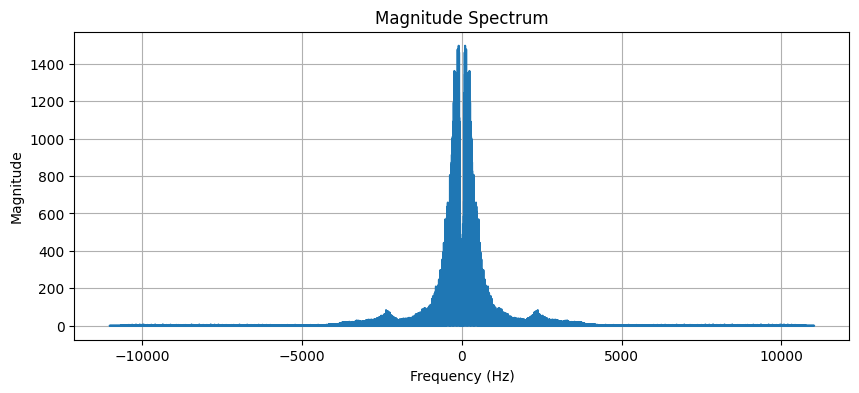

In [7]:
   # Apply Fourier Transform to analyze frequency content
fft_data = np.fft.fft(y)
freqs = np.fft.fftfreq(len(y), 1/sr)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(fft_data))
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

As In the frequency domain, negative frequencies typically represent the
same information as positive frequencies due to the complex conjugate
symmetry of the Fourier transform of real-valued signals. Therefore, you
can consider only the positive frequencies (or the absolute values of
frequencies) for analysis.

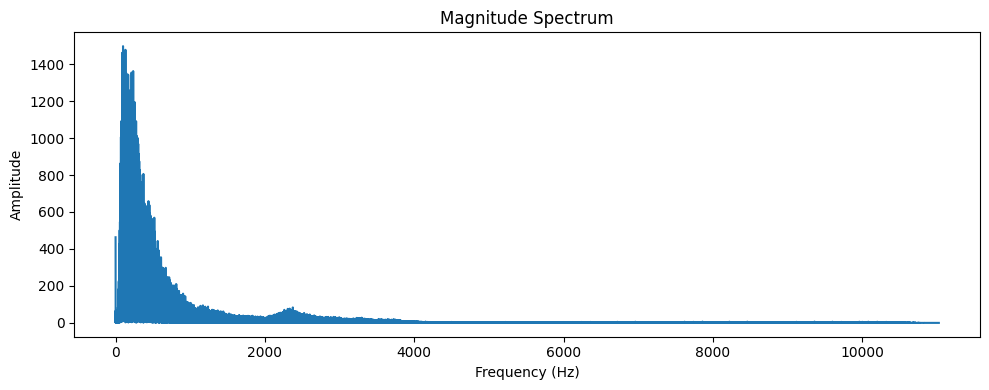

In [8]:
# Compute the magnitude spectrum using FFT
fft = np.fft.fft(y)
magnitude_spectrum = np.abs(fft)
frequency = np.fft.fftfreq(len(y), 1/sr)

# Plot amplitude versus frequency
plt.figure(figsize=(10, 4))
plt.plot(frequency[:len(frequency)//2], magnitude_spectrum[:len(frequency)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Magnitude Spectrum')
plt.tight_layout()
plt.show()

From the graph above, we can estimate that the range of frequencies
associated with breath sounds typically falls between approximately 0 Hz
to 2000 Hz.

– Loudness vs Frequency vs Time (Spectrogram)

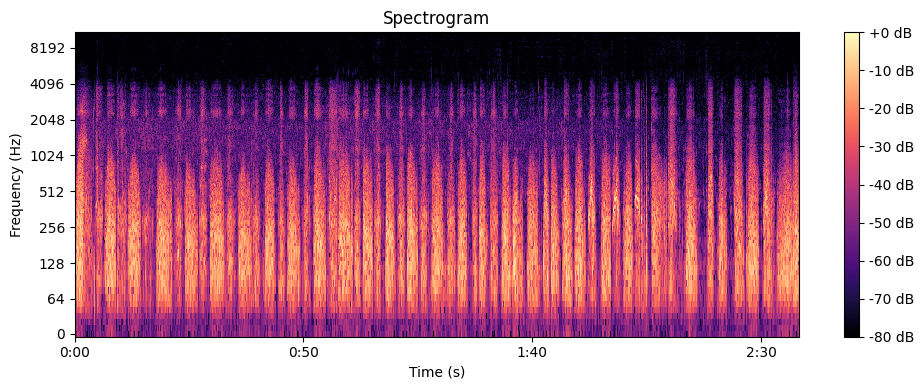

In [9]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

\*\* When have analyzing clean audio data, the process is
straightforward. However, if there is noise or disturbances in the
audio, various filters need to be applied for effective analysis.

### **Results:**

The analysis revealed that the breathing information predominantly lies
within a specific frequency range, as identified through Fourier
transform. The method of counting breaths based on intersection points
between filtered and smoothed audio data showed promising results,
providing a non-invasive and automated approach to monitor breathing
patterns. \*\* We have analyzing clean audio data, the process is
straightforward. However, if there is noise or disturbances in the
audio, various filters need to be applied for effective analysis.

### **Conclusion:**

In conclusion, this study demonstrates the feasibility of analyzing
breathing patterns using audio data collected through a headset earphone
and a mask. By applying digital signal processing techniques and
frequency analysis, we can extract valuable information about breathing
behavior. The method of counting breaths based on intersection points
between filtered and smoothed audio data offers a practical approach for
monitoring breathing patterns in various settings, including healthcare
and fitness applications. Further research and validation are warranted
to refine the proposed methodology and enhance its accuracy and
reliability.

<br> <br>

##### By Aryan Raj

##### IIT Jammu

##### CSE Branch

##### Email : 2022ucs0081ucs0081@iitjammu.ac.in